### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- InvoiceNo: 거래 번호
- StockCode: 상품 코드
- Description: 상품명 
- InvoiceDate: 거래 날짜
- UnitPrice: 상품 단가
- CustomerID: 고객 번호
- Country: 국가명

### 데이터 탐색

In [1]:
import pandas as pd

# csv 데이터 호출
ci_df = pd.read_csv("./datasets/customer_invoice_data.csv")
display(ci_df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#### ✏️ 기획 (판매 현황에 따른 마케팅 전략!)
1. 고객 별 등급 분포 분석
2. 등급 별 소비액, 구입 품목, 활동성 분석
> 회원 별 등급에 따른 마케팅 전략 필요

3. 상품 판매량 분석
> 상품 판매량에 따른 마케팅 전략 필요 

#### 데이터 정보 확인

In [2]:
# 데이터 정보 확인
ci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### 💡 분석
- ci_df 데이터 프레임의 전체 정보
- 541909개 데이터 존재함.
- 7개 컬럼이 존재함.
- Description 결측치 존재함.
- CustomerID 결측치 존재함.

#### 피처 삭제

In [3]:
# 불필요한 피처 삭제
ci_df = ci_df.drop(labels='Description', axis=1)
ci_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


#### 데이터 피처명 변경

In [4]:
# 데이터 피처명 변경
ci_df.columns = ['Order_No', 'Product_Code', 'Quantity', 'Order_Date', 'Price', 'Customer_ID', 'Country']

In [5]:
ci_df

,Order_No,Product_Code,Quantity,Order_Date,Price,Customer_ID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


#### 중복행 검사

In [6]:
# 중복행 데이터 개수 확인
ci_df.duplicated().sum()

5270

In [7]:
# 중복행 데이터 확인
ci_df[ci_df.duplicated()]

,Order_No,Product_Code,Quantity,Order_Date,Price,Customer_ID,Country
517,536409,21866,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...
541675,581538,22068,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


#### 💡 분석
- 541909개 데이터 중 5270개 데이터가 중복됨.
<br><br>

#### ❓ 가설
- 중복 데이터가 왜 발생했을까?
> 1. 같은 주문번호에 동일 수량, 동일 상품이 들어간 것은 수집 오류?  
> 2. 견적서에 동일상품을 동일한 수량으로 더 추가한 것일 수도 있지 않을까?(업데이트)
- 5270개의 중복된 데이터를 삭제하는 것이 맞을까?
> 2번 가설이라면, 중복 데이터를 삭제하지 않고 포함해야 함.

In [8]:
# 중복행 데이터 삭제
# ci_df = ci_df[~ (ci_df.duplicated())]
# ci_df

#### 이상 데이터 확인

#### ❓ 가설
- 환불된 주문 데이터가 있을까?

In [9]:
# 상품 개수가 음수로 나오는 데이터 확인
ci_df[ci_df['Quantity'] <= 0]

,Order_No,Product_Code,Quantity,Order_Date,Price,Customer_ID,Country
141,C536379,D,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...
540449,C581490,23144,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


#### 💡 분석
- 수량이 음수로 나오는 환불 데이터가 존재하며, 취소된 주문은 주문번호에 C로 구분함.
- 판매 데이터에 따른 마케팅 전략이 필요하기 때문에, 환불 데이터는 삭제함.

In [10]:
# 상품 개수가 음수로 나오는 데이터 삭제
ci_df = ci_df[~ (ci_df['Quantity'] <= 0)]
ci_df

,Order_No,Product_Code,Quantity,Order_Date,Price,Customer_ID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


#### 결측치 검사

In [11]:
# 결측치 데이터 개수 확인
ci_df.isna().sum()

Order_No             0
Product_Code         0
Quantity             0
Order_Date           0
Price                0
Customer_ID     133361
Country              0
dtype: int64

In [12]:
# 결측치 데이터 확인
ci_df[ci_df['Customer_ID'].isna()]

,Order_No,Product_Code,Quantity,Order_Date,Price,Customer_ID,Country
622,536414,22139,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...
541536,581498,85099B,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [13]:
ci_df[ci_df['Order_No'] == '536414']

,Order_No,Product_Code,Quantity,Order_Date,Price,Customer_ID,Country
622,536414,22139,56,12/1/2010 11:52,0.0,NaN,United Kingdom


#### ❓ 가설
- 주문번호는 한 고객의 아이디밖에 가질 수 있음.
- 같은 주문번호를 가지지만, Customer_ID가 채워져있는 데이터가 있을 수도 있지 않을까?
- 같은 주문번호를 가지는데, Customer_ID 값이 있는 데이터가 있다면, 해당 값으로 결측치를 대체해볼까?
- 그래도 남아있는 결측치는 Customer_ID를 찾을 수 없기 때문에 삭제!

In [14]:
ci_df_copy = ci_df.copy()

# Order_No 그룹에서 Customer_ID의 결측치를 유효한 이전의 값(ffill)으로 변환(transform)하기
ci_df_copy['Customer_ID'] = ci_df.groupby('Order_No')['Customer_ID'].transform(lambda x: x.ffill())
# Order_No 그룹에서 Customer_ID의 결측치를 유효한 다음 값(ffill)으로 변환(transform)하기
ci_df_copy['Customer_ID'] = ci_df.groupby('Order_No')['Customer_ID'].transform(lambda x: x.bfill())
ci_df_copy

,Order_No,Product_Code,Quantity,Order_Date,Price,Customer_ID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [15]:
# 결측치 데이터 확인
ci_df_copy[ci_df_copy['Customer_ID'].isna()]

,Order_No,Product_Code,Quantity,Order_Date,Price,Customer_ID,Country
622,536414,22139,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...
541536,581498,85099B,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [16]:
# 결측치 데이터 삭제
ci_df_copy = ci_df_copy[~ (ci_df_copy['Customer_ID'].isna())]
ci_df_copy

,Order_No,Product_Code,Quantity,Order_Date,Price,Customer_ID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [17]:
# 결측치 데이터 개수 확인
ci_df_copy.isna().sum()

Order_No        0
Product_Code    0
Quantity        0
Order_Date      0
Price           0
Customer_ID     0
Country         0
dtype: int64

#### 💡 분석
- 결측치 데이터 대체에도 불구하고 결측치 데이터가 남아있음.
- 해당 결측치 데이터는 삭제함.

### 데이터 전처리

#### Customer_Id 타입 변환

In [18]:
# Customer_Id 기존 데이터 타입 확인
print(ci_df_copy['Customer_ID'].dtypes)

# 실수에서 정수 타입으로 변환
ci_df_copy = ci_df_copy.astype({'Customer_ID': 'int32'})
# Customer_Id 변경 데이터 타입 확인
print(ci_df_copy['Customer_ID'].dtypes)
ci_df_copy

float64
int32


,Order_No,Product_Code,Quantity,Order_Date,Price,Customer_ID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680,France


#### Order_Date 현재 기준으로 변경

In [19]:
# 날짜 데이터 datetime으로 형식 변환
ci_df_copy['Order_Date'] = pd.to_datetime(ci_df_copy['Order_Date'])

# 날짜 내림차순 정렬
ci_df_copy.sort_values(by=['Order_Date'], ascending = False)

,Order_No,Product_Code,Quantity,Order_Date,Price,Customer_ID,Country
541908,581587,22138,3,2011-12-09 12:50:00,4.95,12680,France
541901,581587,22367,8,2011-12-09 12:50:00,1.95,12680,France
541895,581587,22556,12,2011-12-09 12:50:00,1.65,12680,France
541896,581587,22555,12,2011-12-09 12:50:00,1.65,12680,France
541897,581587,22728,4,2011-12-09 12:50:00,3.75,12680,France
...,...,...,...,...,...,...,...
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,6,2010-12-01 08:26:00,4.25,17850,United Kingdom


In [20]:
# 데이터 중 가장 최신 날짜 가져오기
recently_date = pd.to_datetime(ci_df_copy['Order_Date'].max())
print(recently_date)

# 현재 기준으로 변경하기
ci_df_copy['Order_Date'] = (recently_date - pd.to_datetime(ci_df_copy['Order_Date'])).dt.days

# 날짜 오름차순 정렬(최신순)
ci_df_copy.sort_values(by=['Order_Date'], ascending = True)

2011-12-09 12:50:00


,Order_No,Product_Code,Quantity,Order_Date,Price,Customer_ID,Country
541908,581587,22138,3,0,4.95,12680,France
538743,581414,84997B,1,0,4.15,14730,United Kingdom
538744,581414,22757,2,0,0.39,14730,United Kingdom
538745,581414,21137,1,0,3.75,14730,United Kingdom
538746,581414,22094,1,0,0.39,14730,United Kingdom
...,...,...,...,...,...,...,...
718,536425,22645,12,373,1.45,13758,United Kingdom
717,536425,22644,12,373,1.45,13758,United Kingdom
716,536425,22646,12,373,1.45,13758,United Kingdom
730,536437,17021,600,373,0.24,13694,United Kingdom


#### 총 구매 금액

In [21]:
# 주문 수량과 상품 단가를 곱하여 총합 구하기
ci_df_copy['total'] = ci_df_copy['Quantity'] * ci_df_copy['Price']
ci_df_copy

,Order_No,Product_Code,Quantity,Order_Date,Price,Customer_ID,Country,total
0,536365,85123A,6,373,2.55,17850,United Kingdom,15.30
1,536365,71053,6,373,3.39,17850,United Kingdom,20.34
2,536365,84406B,8,373,2.75,17850,United Kingdom,22.00
3,536365,84029G,6,373,3.39,17850,United Kingdom,20.34
4,536365,84029E,6,373,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,12,0,0.85,12680,France,10.20
541905,581587,22899,6,0,2.10,12680,France,12.60
541906,581587,23254,4,0,4.15,12680,France,16.60
541907,581587,23255,4,0,4.15,12680,France,16.60


#### Recency

In [22]:
# 회원별 최근 결제 일자 가져오기
new_df = ci_df_copy.groupby('Customer_ID')['Order_Date'].min().reset_index(name='RecentlyDate')
new_df

,Customer_ID,RecentlyDate
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309
...,...,...
4334,18280,277
4335,18281,180
4336,18282,7
4337,18283,3


#### Frequency

In [23]:
# 회원별 주문 횟수 가져오기
new_df['Oder_count'] = ci_df_copy.groupby('Customer_ID')['Order_No'].count().reset_index()['Order_No']
new_df

,Customer_ID,RecentlyDate,Oder_count
0,12346,325,1
1,12347,1,182
2,12348,74,31
3,12349,18,73
4,12350,309,17
...,...,...,...
4334,18280,277,10
4335,18281,180,7
4336,18282,7,12
4337,18283,3,756


#### Monetary

In [24]:
# 회원별 총 주문액 가져오기
new_df['total_Pirce'] = ci_df_copy.groupby('Customer_ID').sum('total').reset_index()['total']
new_df

,Customer_ID,RecentlyDate,Oder_count,total_Pirce
0,12346,325,1,77183.60
1,12347,1,182,4310.00
2,12348,74,31,1797.24
3,12349,18,73,1757.55
4,12350,309,17,334.40
...,...,...,...,...
4334,18280,277,10,180.60
4335,18281,180,7,80.82
4336,18282,7,12,178.05
4337,18283,3,756,2094.88


In [25]:
# 중복값 검사
new_df.duplicated().sum()

0

### 정규화

In [26]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 프레임 복사
df_copy = new_df.copy()
# Customer_ID 피처 삭제
rfm = df_copy.drop(labels=['Customer_ID'], axis=1)

# 정규화 진행
normalization = MinMaxScaler()
rfm_normalization = normalization.fit_transform(rfm)

In [27]:
# 정규화된 데이터를 데이터 프레임으로 변환, 피처는 rfm과 동일하게 설정
rfm = pd.DataFrame(rfm_normalization, columns=rfm.columns)
rfm

,RecentlyDate,Oder_count,total_Pirce
0,0.871314,0.000000,0.275453
1,0.002681,0.023069,0.015382
2,0.198391,0.003824,0.006414
3,0.048257,0.009177,0.006272
4,0.828418,0.002039,0.001193
...,...,...,...
4334,0.742627,0.001147,0.000645
4335,0.482574,0.000765,0.000288
4336,0.018767,0.001402,0.000635
4337,0.008043,0.096227,0.007476


#### 회원 등급

In [28]:
# 날짜가 낮을수록 최신, 최신 점수가 더 높아야 하기 때문에 1을 빼서 점수를 높여주기
rfm['RecentlyDate'] = 1 - rfm['RecentlyDate']

# rfm을 더하여 TotalScore 구하기
new_df['TotalScore'] = rfm[['RecentlyDate', 'Oder_count', 'total_Pirce']].sum(axis=1)
new_df

,Customer_ID,RecentlyDate,Oder_count,total_Pirce,TotalScore
0,12346,325,1,77183.60,0.404139
1,12347,1,182,4310.00,1.035770
2,12348,74,31,1797.24,0.811846
3,12349,18,73,1757.55,0.967192
4,12350,309,17,334.40,0.174814
...,...,...,...,...,...
4334,18280,277,10,180.60,0.259164
4335,18281,180,7,80.82,0.518479
4336,18282,7,12,178.05,0.983271
4337,18283,3,756,2094.88,1.095661


In [29]:
import numpy as np

# 회원 등급 책정을 위해 백분위수 계산
# 각 백분위 수는 각 변수에 할당
l1, l2, l3, l4 = np.percentile(new_df['TotalScore'], [15, 40, 75, 95])
print(l1, l2, l3, l4)

0.4223897225144714 0.8208106767883478 0.9732359229664727 1.0382309491718231


In [30]:
# 회원의 등급 책정을 위한 함수 선언
def get_level(x):
    if x <= l1:
        return 5
    if x > l1 and x <= l2:
        return 4
    if x > l2 and x <= l3:
        return 3
    if x > l3 and x <= l4:
        return 2
    return 1

In [31]:
# 데이터 프레임에 Level 피처 추가(각 회원 등급 추가)
new_df['Level'] = new_df['TotalScore'].apply(get_level)
new_df

,Customer_ID,RecentlyDate,Oder_count,total_Pirce,TotalScore,Level
0,12346,325,1,77183.60,0.404139,5
1,12347,1,182,4310.00,1.035770,2
2,12348,74,31,1797.24,0.811846,4
3,12349,18,73,1757.55,0.967192,3
4,12350,309,17,334.40,0.174814,5
...,...,...,...,...,...,...
4334,18280,277,10,180.60,0.259164,5
4335,18281,180,7,80.82,0.518479,4
4336,18282,7,12,178.05,0.983271,2
4337,18283,3,756,2094.88,1.095661,1


In [32]:
# 각 등급의 데이터 값의 이름을 바꿔주기
new_df['Level'] = new_df['Level'].replace([5, 4, 3, 2, 1], ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])
new_df

,Customer_ID,RecentlyDate,Oder_count,total_Pirce,TotalScore,Level
0,12346,325,1,77183.60,0.404139,Bronze
1,12347,1,182,4310.00,1.035770,Diamond
2,12348,74,31,1797.24,0.811846,Silver
3,12349,18,73,1757.55,0.967192,Gold
4,12350,309,17,334.40,0.174814,Bronze
...,...,...,...,...,...,...
4334,18280,277,10,180.60,0.259164,Bronze
4335,18281,180,7,80.82,0.518479,Silver
4336,18282,7,12,178.05,0.983271,Diamond
4337,18283,3,756,2094.88,1.095661,VIP


In [33]:
# 등급 별 회원 명수 확인 
new_df['Level'].value_counts()

Level
Gold       1518
Silver     1085
Diamond     868
Bronze      651
VIP         217
Name: count, dtype: int64

#### 각 회원의 지역 추가

In [34]:
# 회원 별 국가 추가
new_df['Location'] = ci_df_copy.groupby('Customer_ID')['Country'].transform('first')
new_df

,Customer_ID,RecentlyDate,Oder_count,total_Pirce,TotalScore,Level,Location
0,12346,325,1,77183.60,0.404139,Bronze,United Kingdom
1,12347,1,182,4310.00,1.035770,Diamond,United Kingdom
2,12348,74,31,1797.24,0.811846,Silver,United Kingdom
3,12349,18,73,1757.55,0.967192,Gold,United Kingdom
4,12350,309,17,334.40,0.174814,Bronze,United Kingdom
...,...,...,...,...,...,...,...
4334,18280,277,10,180.60,0.259164,Bronze,United Kingdom
4335,18281,180,7,80.82,0.518479,Silver,United Kingdom
4336,18282,7,12,178.05,0.983271,Diamond,United Kingdom
4337,18283,3,756,2094.88,1.095661,VIP,United Kingdom


### 분석

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

new_df

,Customer_ID,RecentlyDate,Oder_count,total_Pirce,TotalScore,Level,Location
0,12346,325,1,77183.60,0.404139,Bronze,United Kingdom
1,12347,1,182,4310.00,1.035770,Diamond,United Kingdom
2,12348,74,31,1797.24,0.811846,Silver,United Kingdom
3,12349,18,73,1757.55,0.967192,Gold,United Kingdom
4,12350,309,17,334.40,0.174814,Bronze,United Kingdom
...,...,...,...,...,...,...,...
4334,18280,277,10,180.60,0.259164,Bronze,United Kingdom
4335,18281,180,7,80.82,0.518479,Silver,United Kingdom
4336,18282,7,12,178.05,0.983271,Diamond,United Kingdom
4337,18283,3,756,2094.88,1.095661,VIP,United Kingdom


#### 고객 별 등급 분포 분석

In [36]:
# 등급 별 고객 수 확인
new_df['Level'].value_counts()

Level
Gold       1518
Silver     1085
Diamond     868
Bronze      651
VIP         217
Name: count, dtype: int64

<Axes: xlabel='Level', ylabel='count'>

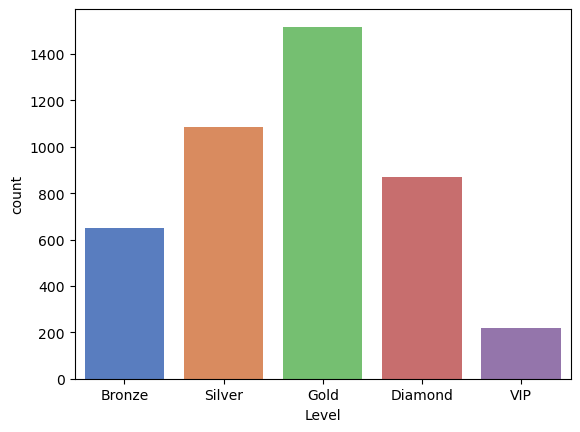

In [37]:
# 등급 별 고객수 도식화 하기
level_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

# 카테고리(측정불가 데이터)이기 때문에 countplot 사용
sns.countplot(x='Level', data=new_df, palette='muted', order=level_columns)

#### 💡 분석
- 총 4339명의 고객을 보유함.
- 고객의 등급은 Bronze, Silver, Gold, Diamond, VIP 순으로 책정됨.
- Gold 고객이 1518명으로 가장 많고, VIP 고객이 271명으로 가장 적음.
- Gold 1518명, Silver 1085명, Diamond 868명, Bronze 651명 순으로 나타남.

#### 📌 시사점
- Bronze 고객 보다 Silver, Gold 회원이 더 많은 것으로 나타는 것으로 보아 고객 유지는 잘 되고 있는 것으로 판단되나, 신규 고객 유입이 저조하다 판단됨. 신규 고객을 유치하기 위해 신규 고객에 대한 마케팅 전략이 필요함.

#### 등급 별 소비액

In [38]:
# 등급 별 총 소비액 확인
level_price_df = new_df.groupby('Level').sum('total_Pirce').reset_index()
level_price_df

,Level,Customer_ID,RecentlyDate,Oder_count,total_Pirce,TotalScore
0,Bronze,9971532,189124,15057,341981.580,147.021707
1,Diamond,13226849,7497,109203,1978711.510,868.770108
2,Gold,23285238,58062,101325,1731368.141,1381.237462
3,Silver,16591692,141395,44530,933966.813,714.795293
4,VIP,3311115,1020,127809,3925379.860,244.536366


In [39]:
level_price_df['total_Pirce'].sum()

8911407.904

<Axes: xlabel='Level', ylabel='total_Pirce'>

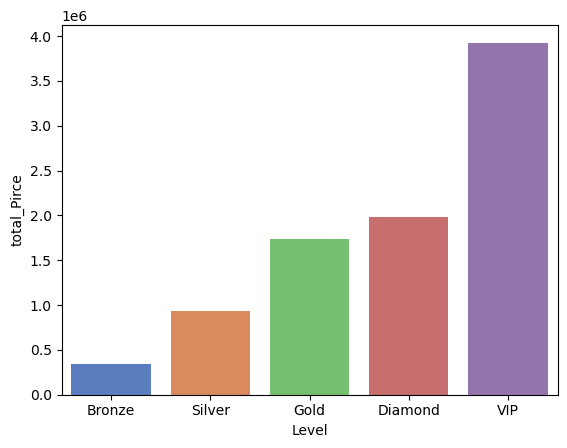

In [40]:
# 등급 별 총 소비액 도식화
level_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

# 수량 데이터(측정 가능) 데이터이기 때문에 barplot를 사용
sns.barplot(x='Level', y='total_Pirce', data=level_price_df, palette='muted', order=level_columns)

#### 💡 분석
- 총 매출액은 8911407.904으로 나타남.
- VIP 고객의 매출액이 3925379.860으로 가장 높고, Bronze 고객의 매출액이 341981.580이 가장 낮음.
- VIP 3925379.860, Diamond 1978711.510, Gold 1731368.141, Silver 933966.813, Bronze 341981.580 순으로 나타남.

#### 📌 시사점
- VIP 고객수가 가장 적음에도 해당 등급에서 가장 높은 매출액을 달성하였으며, VIP 고객의 이탈 시 총 매출액의 영향이 클 것으로 판단됨. VIP 고객 유지를 위한 마케팅 전략이 필요함.

In [41]:
# 동일한 범위에서 정확한 분석을 위해 등급별 매출액, 인원수로 정규화 진행

# 등급 별 인원수를 구해 새로운 데이터 프레임에 담기
level_counts = new_df['Level'].value_counts().reset_index()


# 총 매출액 데이터 추가
level_pirce = level_price_df.copy()
level_pirce = level_pirce.drop(labels=['Customer_ID', 'RecentlyDate', 'Oder_count', 'TotalScore'], axis=1)

# 데이터 프레임 합치기
merged_df = pd.merge(level_counts, level_pirce, on='Level')

# level 피처 삭제
rfm = merged_df.drop(labels=['Level'], axis=1)
display(rfm)

# 정규화 진행
normalization = MinMaxScaler()
rfm_normalization = normalization.fit_transform(rfm)

,count,total_Pirce
0,1518,1731368.141
1,1085,933966.813
2,868,1978711.510
3,651,341981.580
4,217,3925379.860


In [42]:
# 정규화된 데이터 데이터 프레임으로 변환
rfm = pd.DataFrame(rfm_normalization, columns=rfm.columns)
# 레벨 피처 추가
rfm['Level'] = merged_df['Level']
# 등급 값 추가
rfm['PriceTotalScore'] = rfm[['count', 'total_Pirce']].sum(axis=1)
# 등급 값만 필요하므로 사용이 완료된 피처 삭제
rfm = rfm.drop(labels=['count', 'total_Pirce'], axis=1)
rfm

,Level,PriceTotalScore
0,Gold,1.387729
1,Silver,0.832381
2,Diamond,0.957138
3,Bronze,0.333590
4,VIP,1.000000


In [43]:
# 데이터 프레임 합치기
level_price_df = pd.merge(level_price_df, rfm, on='Level')
level_price_df

,Level,Customer_ID,RecentlyDate,Oder_count,total_Pirce,TotalScore,PriceTotalScore
0,Bronze,9971532,189124,15057,341981.580,147.021707,0.333590
1,Diamond,13226849,7497,109203,1978711.510,868.770108,0.957138
2,Gold,23285238,58062,101325,1731368.141,1381.237462,1.387729
3,Silver,16591692,141395,44530,933966.813,714.795293,0.832381
4,VIP,3311115,1020,127809,3925379.860,244.536366,1.000000


<Axes: xlabel='Level', ylabel='PriceTotalScore'>

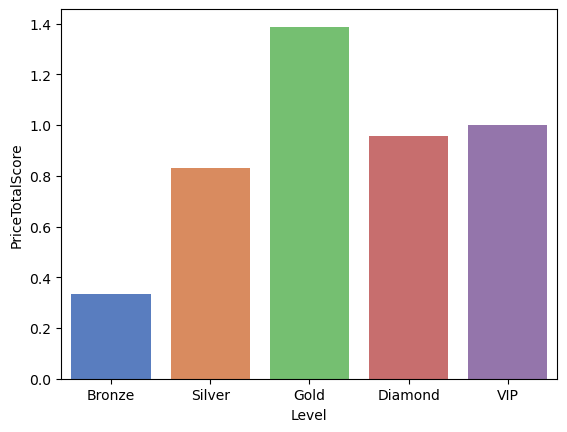

In [44]:
level_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

# 수량 데이터(측정 가능) 데이터이기 때문에 barplot를 사용
sns.barplot(x='Level', y='PriceTotalScore', data=level_price_df, palette='muted', order=level_columns)

#### 💡 분석
- 동일 범위에서 매출액을 비교하였을 때, Gold의 매출액이 1.387729으로 가장 높고, Bronze의 매출액이 0.333590이 가장 낮음.
- Gold 1.387729, VIP 1.000000, Diamond 0.957138, Silver 0.832381, Bronze 0.333590 순으로 나타남.

#### 📌 시사점
- Bronze 고객의 매출액 추이로 볼 때, 현재 Bronze 고객을 대상으로한 마케팅 전략이 제대로 추진되지 않다고 판단됨. Bronze 고객의 구매를 높이기 위한 마케팅 전략이 필요함.

#### 등급 별 구입 품목

In [45]:
# 등급 별 총 구입 품목 확인
new_df['Product_Code'] = ci_df.groupby('Customer_ID')['Product_Code'].apply(lambda x: ', '.join(x)).reset_index()['Product_Code']
new_df

# Product_Code를 ','를 기준으로 분할하여 리스트로 변환하는 함수
def count_product(group):
    codes = group['Product_Code'].str.split(', ')
    # 각 그룹별로 Product_Code의 개수를 세기
    return pd.Series([len(codes) for codes in codes])

# Level로 그룹화하고 각 그룹에 대해 Product_Code의 개수를 세는 함수를 적용
level_product_counts = new_df.groupby('Level').apply(count_product).reset_index()
level_product_counts.columns = ['Level', 'Product_Code', 'Product_Code_Count']

display(level_product_counts)

,Level,Product_Code,Product_Code_Count
0,Bronze,0,1
1,Bronze,1,17
2,Bronze,2,58
3,Bronze,3,10
4,Bronze,4,22
...,...,...,...
4334,VIP,212,444
4335,VIP,213,1279
4336,VIP,214,272
4337,VIP,215,271


In [46]:
# 전체 상위 5개 상품
all_df = level_product_counts.groupby('Product_Code')['Product_Code_Count'].sum().reset_index()
top_all_df = all_df.nlargest(5, 'Product_Code_Count')

# 브론즈 상위 5개 상품
bronze_df = level_product_counts[level_product_counts['Level'] == 'Bronze']

# 등급별로 상위 5개의 상품 선택(nlargest: 가장 큰 값 가져와줌)(nsmallest: 가장 작은 값 가져와줌)
top_bronze_df = bronze_df.groupby('Level').apply(lambda x: x.nlargest(5, 'Product_Code_Count'))

# 실버 상위 5개 상품
silver_df = level_product_counts[level_product_counts['Level'] == 'Silver']

# 등급별로 상위 5개의 상품 선택(nlargest: 가장 큰 값 가져와줌)(nsmallest: 가장 작은 값 가져와줌)
top_silver_df = silver_df.groupby('Level').apply(lambda x: x.nlargest(5, 'Product_Code_Count'))

# 골드 상위 5개 상품
gold_df = level_product_counts[level_product_counts['Level'] == 'Gold']

# 등급별로 상위 5개의 상품 선택(nlargest: 가장 큰 값 가져와줌)(nsmallest: 가장 작은 값 가져와줌)
top_gold_df = gold_df.groupby('Level').apply(lambda x: x.nlargest(5, 'Product_Code_Count'))

# 다이아몬드 상위 5개 상품
diamond_df = level_product_counts[level_product_counts['Level'] == 'Diamond']

# 등급별로 상위 5개의 상품 선택(nlargest: 가장 큰 값 가져와줌)(nsmallest: 가장 작은 값 가져와줌)
top_diamond_df = diamond_df.groupby('Level').apply(lambda x: x.nlargest(5, 'Product_Code_Count'))

# 브이아이피 상위 5개 상품
vip_df = level_product_counts[level_product_counts['Level'] == 'VIP']

# 등급별로 상위 5개의 상품 선택(nlargest: 가장 큰 값 가져와줌)(nsmallest: 가장 작은 값 가져와줌)
top_vip_df = vip_df.groupby('Level').apply(lambda x: x.nlargest(5, 'Product_Code_Count'))

In [ ]:
display(top_all_df)
display(top_bronze_df)
display(top_silver_df)
display(top_gold_df)
display(top_diamond_df)
display(top_vip_df)

,Product_Code,Product_Code_Count
202,202,7992
99,99,5854
68,68,5484
16,16,4673
89,89,2835


Level  Product_Code  Product_Code_Count
Level                                               
Bronze 593  Bronze           593                 297
       379  Bronze           379                 208
       253  Bronze           253                 170
       86   Bronze            86                 159
       352  Bronze           352                 157

Level  Product_Code  Product_Code_Count
Level                                                
Silver 3945  Silver           908                 543
       3878  Silver           841                 327
       3902  Silver           865                 316
       3326  Silver           289                 307
       3438  Silver           401                 281

In [ ]:
#
sns.barplot(x='Product_Code', y='Product_Code_Count', data=top_all_df, palette='muted')

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

sns.barplot(ax=axes[0], x='Product_Code', y='Product_Code_Count', data=top_bronze_df, palette='muted')
axes[0].set_title('bronze')
sns.barplot(ax=axes[1], x='Product_Code', y='Product_Code_Count', data=top_silver_df, palette='muted')
axes[1].set_title('silver')
sns.barplot(ax=axes[2], x='Product_Code', y='Product_Code_Count', data=top_gold_df, palette='muted')
axes[2].set_title('gold')
sns.barplot(ax=axes[3], x='Product_Code', y='Product_Code_Count', data=top_diamond_df, palette='muted')
axes[3].set_title('diamond')
sns.barplot(ax=axes[4], x='Product_Code', y='Product_Code_Count', data=top_vip_df, palette='muted')
axes[4].set_title('vip')

#### 💡 분석
- 전체 상품 중 가장 인기 있는 상품은 202번으로 7992개가 판매되었다.
- 가장 높은 판매율을 기록한 상위 5개 제품은 202번 7992개, 99번 5854개, 68번 5484개, 16번 4673개, 89번 2835개 순으로 나타났다.

<br>

- Bronze 등급에서 가장 인기 있는 상품은 593번으로 297개가 판매되었다.
- Bronze 등급에서 가장 가장 높은 판매율을 기록한 상위 5개 제품은 593번 297개, 379번 208개, 253번 170개, 56번 159개, 352번 157개로 나타났다.

<br>

- Silver 등급에서 가장 인기 있는 상품은 908번으로 543개가 판매되었다.
- Silver 등급에서 가장 가장 높은 판매율을 기록한 상위 5개 제품은 908번 543개, 841번 327개, 865번 316개, 289번 307개, 401번 281개로 나타났다.

<br>

- Gold 등급에서 가장 인기 있는 상품은 1115번으로 585개가 판매되었다.
- Gold 등급에서 가장 가장 높은 판매율을 기록한 상위 5개 제품은 1115번 585개, 854번 411개, 1196번 407개, 85번 390개, 603번 385개로 나타났다.

<br>

- Diamond 등급에서 가장 인기 있는 상품은 642번으로 660개가 판매되었다.
- Diamond 등급에서 가장 가장 높은 판매율을 기록한 상위 5개 제품은 642번 660개, 328번 324개, 91번 538개, 462번 519개, 686번 516개로 나타났다.

<br>

- VIP 등급에서 가장 인기 있는 상품은 202번으로 7847개가 판매되었다.
- VIP 등급에서 가장 가장 높은 판매율을 기록한 상위 5개 제품은 202번 7847개, 99번 5677개, 68번 5111개, 16번 4596개, 89번 2700개로 나타났다.

#### 📌 시사점
- 전체 상품 중 가장 판매량이 높은 상품은 202번 상품이지만, VIP 등급에서만 약 98% 비율을 차지함. 인기 상품은 VIP 비중이 큼.
- 등급 별 인기 있는 상품의 품목이 모두 다른 것으로 나타남. 각 등급별 구매율이 높은 제품에 대한 마케팅 전략이 필요함.

#### 등급 별 활동성

In [ ]:
# 동일한 범위에서 정확한 분석을 위해 등급별 매출액, 인원수, 활동성으로 정규화 진행

# 등급 별 인원수를 구해 새로운 데이터 프레임에 담기
level_counts = new_df['Level'].value_counts().reset_index()

# 활동성 평균 데이터 추가
level_recently = new_df.groupby('Level')['RecentlyDate'].mean().reset_index()

# 총 매출액 데이터 추가
level_pirce = level_price_df.copy()
level_pirce = level_pirce.drop(labels=['Customer_ID', 'RecentlyDate', 'Oder_count', 'TotalScore'], axis=1)

# 데이터 프레임 합치기
merged_df = pd.merge(level_counts, level_recently, on='Level')
merged_df = pd.merge(merged_df, level_pirce, on='Level')

# level 피처 삭제
rfm = merged_df.drop(labels=['Level'], axis=1)
display(rfm)

# 정규화 진행
normalization = MinMaxScaler()
rfm_normalization = normalization.fit_transform(rfm)

In [ ]:
# 정규화된 데이터 데이터 프레임으로 변환
rfm = pd.DataFrame(rfm_normalization, columns=rfm.columns)
# 레벨 피처 추가
rfm['Level'] = merged_df['Level']
# 등급 값 추가
rfm['RecentlyScore'] = rfm[['count', 'RecentlyDate', 'total_Pirce']].sum(axis=1)
# 등급 값만 필요하므로 사용이 완료된 피처 삭제
rfm = rfm.drop(labels=['count', 'RecentlyDate', 'total_Pirce', 'PriceTotalScore'], axis=1)
rfm

In [ ]:
# 데이터 프레임 합치기
level_price_df = pd.merge(level_price_df, rfm, on='Level')
level_price_df

In [ ]:
level_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

# 수량 데이터(측정 가능) 데이터이기 때문에 barplot를 사용
sns.barplot(x='Level', y='RecentlyScore', data=level_price_df, palette='muted', order=level_columns)

#### 💡 분석
- Gold 고객의 활동성이 가장 높고, Diamond 고객의 활동성 가장 낮음.
- Gold, Bronze, Silver, VIP, Diamond 순으로 나타남.

#### 📌 시사점
- 매출액의 높은 부분을 차지하고 있는 Diamond, VIP 고객이 이탈하게 될 시 총 매출액에 큰 손실이있을 것이라 판단됨. 해당 고객의 유지를 위한 마케팅 전략이 필요함.

### 마케팅 전략 제안

1. 신규 고객 유치 마케팅 전략
> 첫 구매 혜택을 제공하거나 맞춤형 광고를 제작하여 홍보를 강화하는 등 신규 고객 유치를 위한 마케팅 방안을 마련한다.

2. 각 등급에 따른 혜택 제공
> 각 등급에 따른 할인 혹은 혜택을 제공하여, 고객의 만족도를 높이고 이탈을 방지한다.

3. VIP 고객 유지 전략
> VIP 고객 수요가 있는 상품을 개선/개발하여 더 다양한 선택지를 제공하고, VIP만의 프리미엄한 혜택을 제공하여 고객의 만족도를 높이고 이탈을 방지한다.

4. Bronze 관리 강화 전략
> Bronze 고객의 구매를 높이기 위한 혜택 및 프로모션을 진행하여 구매를 유도한다.

5. 상품별 마케팅 전략
> 수요가 높은 상품을 개선/개발하여 더 다양한 선택지를 제공하고, 인기 상품의 프로모션 진행으로 구매를 촉진한다.

6. 이탈 고객 대상 마케팅 전략
> 이탈 가능성이 높은 등급을 대상으로한 특별한 프로모션을 진행한다.  
> SMS, 이메일 등으로 다양한 혜택을 제공하며 이탈을 방지한다.